# Исследование надежности заемщиков.

**Цель исследования** — ответить на четыре вопроса, которые будут учтены при построении модели системы оценивающей способность потенциального заёмщика вернуть кредит банку:

1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

**Ход исследования**

Входные данные от банка — статистика о платёжеспособности клиентов, мы получим из файла `data.csv`. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

*Описание данных:*
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита
 
Исследование пройдёт в четыре основных этапа:

1. Обзор данных.
2. Предобработка данных.
3. Декомпозиция исходного датафрейма. Категоризация данных.
4. Ответы на вопросы.

## Обзор данных

Загрузим необходимые для анализа библиотеки.

In [242]:
import pandas as pd
import seaborn as sns

Прочитаем файл, запишем его в переменную `df` и выведем первые 15 строк.

In [243]:
df = pd.read_csv('/datasets/data.csv')
display(df.head(15))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Полуим получим информацию о данных.

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Встречаются пропуски в значениях стажа и дохода. В значениях стажа присутсвуют отрицательные значения и вещественный формат чисел. В обозначении оборазования встречаются повторы из-за использования разного регистра.

## Предобработка данных

### Проверка данных на аномалии и исправления.
Заменим уже найденную ошибку в данных и переведём отрицательные значения в столбце `days_employed` в положительные. Выведем первые 5 строк таблицы с отсортированными по возрастанию значениями в столбце `days_employed`.

In [245]:
df['days_employed'] = abs(df['days_employed'])
display(df.sort_values('days_employed', ascending=False).head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба


Значения имеют большую величину, преположительно данные имеют анамолии. Построим график для удобства анализа.

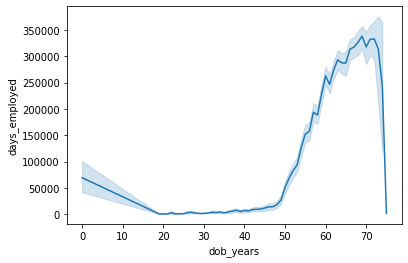

In [246]:
sns.lineplot(data=df, x='dob_years', y='days_employed')

На графике видны анамолии в столбце стажа для пенсионеров. Значения в трудовом стаже явно превышают возраст клиента. Оставим эти значения без обработки, так как они не участвуют в дальнейшем исследовании.

Приведём все значения столбца `education` к маленькому регистру. Выведем количество всех уникальных значений столбца `education`.

In [247]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Проверим количество каждого уникального значения в столбце `children`, нужные нам для ответа на один из вопросов.

In [248]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Здесь мы видим два значения, которые не соостветсвуют действительности ***-1*** и ***20***.   
Проверим их процентное соотношение ко всем значениям.

In [249]:
print('{:.1%} значений имеют аномальное значение количества детей.'.format(df[(df['children'] == 20) | 
                                                                     (df['children'] == -1)]['education'].count() / 
                                                                  df.shape[0]))

0.6% значений имеют аномальное значение количества детей.


Удалим эти значения из нашей таблицы, так как 0,6% не окажут существенного влияния на результат исследования. Перепроверим результат.

In [250]:
df = df.loc[(df['children'] != 20) & (df['children'] != -1)]
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

**Вывод**   
Значения в стоблцах стажа и количества детей имели отрицательные и аномальные значения. Привести значения стажа приблежённо к действительности не удалось. Данные значения не будут использованы в исселедовании, поэтому оставим только изменение на положительные значения. Заменили значения в стоблце образование приведя их к одному регистру и удалили аномальные значения из столбца кол-ва детей. Так же имеются не верные значения в указание пола ***'XNA'*** и возраста ***'0'***, которые мы так же оставим без изменения.

### Заполнение пропусков
Заполним пропущенные значения в стлобцах `days_employed` и `total_income` меданными значениями.

Посчитаем кол-во пропущеных значений в каждом столбце.

In [251]:
df.isna().sum()

children               0
days_employed       2162
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2162
purpose                0
dtype: int64

В столбцах `days_employed` и `total_income` пропущено по 2162 значения.   
Проверим сколько процентов от общего объёма пропущено.

In [252]:
print('Пропущено {:.1%} значений.'.format(df['total_income'].isna().sum() / df.shape[0]))

Пропущено 10.1% значений.


Посмотрим на первые 10 строк с пропущенными значениями

In [253]:
display(df[df['days_employed'].isna()].head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Найденные пропущенные имеются во всех типах занятости.   
Заполним пропущенные значения в стлобце `days_employed` медианными значениями по всему столбцу, и в столбце `total_income` медианными значениями в зависимости от образования и типа занятости.

In [254]:
# Filling in missed values in column "total_income" with median value
# depending on the values in the columns "education" and "income_type"
df['total_income'] = df['total_income'].fillna(df.groupby(['education', 'income_type'])
                                               ['total_income'].transform('median'))
# Filling in missed values in column "days_employed" with median value 
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

Проверим количество пропущенных значений в каждом стоблце ещё раз.

In [255]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод**

Были выявлены пропущенные значения фотмата `NaN` в столбцах `days_employed` и `total_income`. Пропущенные значения составляли 10,1% от всех значений.   
Заполнение пропущенных значений медианой позволяет исключить из расчётов возможные экстремумы и аномалии.   

### Изменение типов данных.
Заменим тип данных в столбцах `days_employed` и `income_type` с вещественного на целочисленный.   
Выведем первые 10 строк таблицы.

In [272]:
try:
    df['total_income'] = df['total_income'].astype('int')
    df['days_employed'] = df['days_employed'].astype('int')
except:
    print('В данных имеются не корретные значения')
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Удаление дубликатов.
Удалим явные дубликаты методом `drop_duplicates`, предварительно посчитав и оценив кол-во явных дубликатов.

In [257]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,2195,41,среднее,1,женат / замужем,0,F,сотрудник,0,136496,покупка жилья для семьи
3290,0,2195,58,среднее,1,гражданский брак,1,F,пенсионер,0,114816,сыграть свадьбу
4182,1,2195,34,высшее,0,гражданский брак,1,F,сотрудник,0,166117,свадьба
4851,0,2195,60,среднее,1,гражданский брак,1,F,пенсионер,0,114816,свадьба
5557,0,2195,58,среднее,1,гражданский брак,1,F,пенсионер,0,114816,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,2195,64,среднее,1,женат / замужем,0,F,пенсионер,0,114816,дополнительное образование
21032,0,2195,60,среднее,1,женат / замужем,0,F,пенсионер,0,114816,заняться образованием
21132,0,2195,47,среднее,1,женат / замужем,0,F,сотрудник,0,136496,ремонт жилью
21281,1,2195,30,высшее,0,женат / замужем,0,F,сотрудник,0,166117,покупка коммерческой недвижимости


Всего 71 явных дубликатов, что составляет примерно 0,3%.   
Удалим явные дубликаты, обновив индексы датафрейма.

In [258]:
df = df.drop_duplicates().reset_index(drop=True)

**Вывод**   
Были удалены явные дубликаты в кол-ве 71 шт.   
Все дубликаты имели пропущенные значения, котрые мы заменили медианными.

## Декомпозиция исходного датафрейма. Категоризация данных.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим "словари", к которым мы сможем обращаться по идентификатору.

In [259]:
# Creating "family_satus" "dictionary" that possible to indetfy "family_satus" by "family_satus_id"
family_status_dict = df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True).sort_values('family_status_id')

# Creating "education" 'dictionary' that possible to indetfy "education" by "education_id"
education_dict = df[['education_id', 'education']].drop_duplicates().reset_index(drop=True).sort_values('education_id')

# Let's print both "dictionaries"
print(family_status_dict, education_dict, sep='\n')

   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  Не женат / не замужем
   education_id            education
0             0               высшее
1             1              среднее
2             2  неоконченное высшее
3             3            начальное
4             4       ученая степень


После того как мы создали словари `family_status_dict` и `education_dict` можем удалить из таблицы столбцы `family_status` и `education`

In [260]:
# Dropping 'family_status' and 'education' coulumns
df = df.drop(['family_status', 'education'], axis=1)

Выведем первые 5 строк для проверки.

In [261]:
display(df.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода.
Добавим категоризацию клиентов банка по уровню дохода. Для этого напишем функцию, которая оценит значение уровня дохода и присвоет категорию в новом столбце `total_income_category` с категориями:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

In [262]:
def income_categorize(row):
    '''
    The function returns assignation catogory of customers in
    depending to their total_income.
    - 0–30000 - "E";
    - 30001–50000 - "D";
    - 50001–200000 - "C";
    - 200001–1000000 - "B";
    - 1000001 and above - "A"
    '''
    income = row['total_income']
    try:
        if income <= 30000:
            return 'E'
        if 30001 <= income <= 50000:
            return 'D'
        if 50001 <= income <= 200000:
            return 'C'
        if 200001 <= income <= 1000000:
            return 'B'
        if income >= 10000001:
            return 'A'
    except:
        return 'Не верное значение дохода'
    

Назначим новый столбец `total_income_category` и применим данную функцию к нашей таблице методом `.apply()`.   
Выведем первые 5 строк таблицы.

In [263]:
df['total_income_category'] = df.apply(income_categorize, axis=1)
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Категоризация целей кредита.
Добавим категоризацию клиентов банка по целям кредита. Для этого напишем функцию, которая оценит цель кредита в стоблце `purpose` и присвоет категорию в новом столбце `purpose_category`, в который войдут следующие категории:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

Перед написанием функции посмотрим все уникальные значения столбца `purpose`.

In [264]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Напишем саму функцию, которая объединит значения в категории.

In [265]:
def purpose_categorize(row):
    '''
    The function returns assignation catogory of customers in
    depending to their purpose.
    '''
    purpose = row['purpose']
    if ('недвиж' in purpose) or ('жил' in purpose):
        return 'операции с недвижимостью'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'образов' in purpose:
        return 'получение образования'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    return 'unknown_category'

Назначим новый столбец `purpose_category` и применим данную функцию к нашей таблице методом `.apply()`. Выведем кол-во  по каждой категории.

In [266]:
df['purpose_category'] = df.apply(purpose_categorize, axis=1)
df['purpose_category'].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

## Ответы на вопросы.

### Зависимость между количеством детей и возвратом кредита в срок.

Построим сводную таблицу зависимости количества детей и среднем значением из столбца значения возврата кредита в срок.

,debt
children,
4,0.097561
2,0.094542
1,0.092346
3,0.081818
0,0.075438
5,0.000000


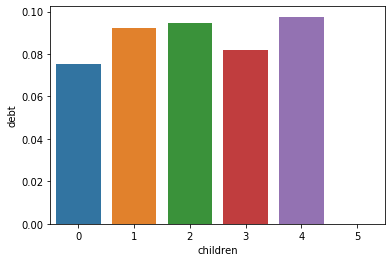

In [267]:
debt_from_children = df.pivot_table(index='children', 
                                    values='debt', 
                                    aggfunc='mean').sort_values('debt', ascending = False)
display(debt_from_children)
sns.barplot(data=debt_from_children.reset_index(), x='children', y='debt')

**Вывод**    
С увеличением количества детей мы видим увеличение количества просроченных задолженностей. Но люди с 3-мя детьми чаще платят в срок чем люди с 1-им ребенком, тогда как люди с 5-ю детьми не имеют задолженностей вовсе. Бездетные, как правило реже просрачивают оплату по кредиту, чем люди с детьми.

### Зависимость между семейным положением и возвратом кредита в срок.

Построим сводную таблицу зависимости семейного положения и среднем значением из столбца значения возврата кредита в срок. Для этого нам потребуется обратиться к созданному ранее словарю категорий семейного статуса `family_status_dict`. 

,family_status_id,debt
family_status,,
Не женат / не замужем,4,0.097639
гражданский брак,1,0.093130
женат / замужем,0,0.075606
в разводе,3,0.070648
вдовец / вдова,2,0.066246


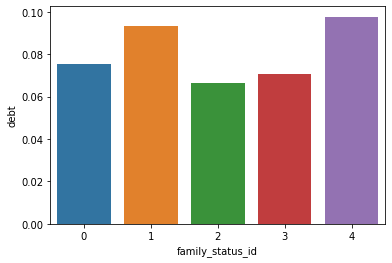

In [268]:
debt_from_family_status = df.pivot_table(index='family_status_id', 
                                    values='debt', 
                                    aggfunc='mean').sort_values('debt', ascending = False)
# Merging new dataframe with family_status_dict
debt_from_family_status = debt_from_family_status.merge(family_status_dict, on='family_status_id')
display(debt_from_family_status.set_index('family_status'))
sns.barplot(data=debt_from_family_status, x='family_status_id', y='debt')

**Вывод**   
Здесь мы видим зависимость: люди не в браке имеют больший процент невозвратов в срок. Но люди находящиеся в разводе или овдовевшие платят в срок чаще, чем люди находящиеся в браке.

### Зависимость между уровнем дохода и возвратом кредита в срок.
Построим сводную таблицу зависимости уровня дохода и среднем значением из столбца значения возврата кредита в срок. Для этого нам потребуется обратиться к созданным ранее категориям дохода в столбце `total_income_category`. Вспомним эти категории:   
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

,debt
total_income_category,
E,0.090909
C,0.085467
B,0.069642
D,0.060172


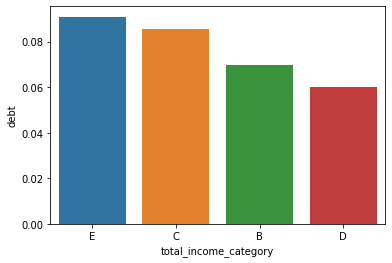

In [269]:
debt_from_income = df.pivot_table(index='total_income_category', 
                                    values='debt', 
                                    aggfunc='mean').sort_values('debt', ascending = False)
display(debt_from_income)
sns.barplot(data=debt_from_income.reset_index(), x='total_income_category', y='debt')

Прежде чем приступить к выводам, посмотрим количество значений по каждой категории

In [270]:
df['total_income_category'].value_counts()

C    15737
B     5198
D      349
E       22
Name: total_income_category, dtype: int64

**Вывод**   
Имеющаяся выборка не является репрезентативной, так как 2/3 все выборки это одна категория. Но исходя из имеющихся данных можно сказать, что люди со среднем (категория "С") и низким (категория "Е") заработком чаще имеют задолженности по кредиту.

### Влияние разных целей кредита на его возврат в срок.

Построим сводную таблицу зависимости целей кредита и среднем значением из столбца значения возврата кредита в срок.

,debt
purpose_category,
операции с автомобилем,0.093480
получение образования,0.092528
проведение свадьбы,0.079118
операции с недвижимостью,0.072551


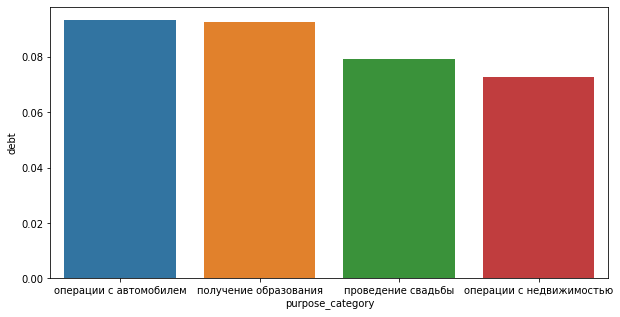

In [271]:
debt_from_purpose = df.pivot_table(index='purpose_category', 
                                    values='debt', 
                                    aggfunc='mean').sort_values('debt', ascending = False)
display(debt_from_purpose)
g = sns.barplot(data=debt_from_purpose.reset_index(), x='purpose_category', y='debt')
g.figure.set_figwidth(10)
g.figure.set_figheight(5) 

**Вывод**   
Среди наши 4-х категорий чаще всего имеют задолженности по кредиту на авто и образование. Реже всего имеют задолженности с целью кредита недвижимость, так же примерно как и на проведение свадьбы.

## Общий вывод:

Семейный статус влияет на вероятность платежей по кредиту в срок - люди, бывший в браке чаще плятят в срок чем те, кто не бывали в браке, причем разведенные и овдовевшие платят в срок чаще, чем люди в браке. Чем больше детей, тем чаще имеются задолженности по кредиту, бездетные реже имеют задолженности. Кредиты взятые на недвижимость и проведение свадьбы реже возвращают позже срока, чем кредиты на авто и образование.